# Model Assessment

**Objective**

To access how the $k$-NN model is performing by reviewing the expected prediction error. In addition, scikit-learn's Pipelines will be introduced, which are a very useful tools to avoid validation overfitting during cross-validation.


#### 1) Introduction and Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv("housing_clean.csv") # Read in the data, csv

In [3]:
housing.head(5) # Display the first # of rows of the DataFrame

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_bedroom,rooms_per_household,people_per_household,ocean_proximity_enc
0,-122.23,37.88,41.0,8.3252,452600.0,6.821705,6.984127,2.555556,3.0
1,-122.22,37.86,21.0,8.3014,358500.0,6.418626,6.238137,2.109842,3.0
2,-122.24,37.85,52.0,7.2574,352100.0,7.721053,8.288136,2.802260,3.0
3,-122.25,37.85,52.0,5.6431,341300.0,5.421277,5.817352,2.547945,3.0
4,-122.25,37.85,52.0,3.8462,342200.0,5.810714,6.281853,2.181467,3.0


In [4]:
housing.info() # Prints concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20433 non-null  float64
 1   latitude              20433 non-null  float64
 2   housing_median_age    20433 non-null  float64
 3   median_income         20433 non-null  float64
 4   median_house_value    20433 non-null  float64
 5   rooms_per_bedroom     20433 non-null  float64
 6   rooms_per_household   20433 non-null  float64
 7   people_per_household  20433 non-null  float64
 8   ocean_proximity_enc   20433 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
housing.describe() # Computes summary statistics for DataFrame

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_bedroom,rooms_per_household,people_per_household,ocean_proximity_enc
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,3.871162,206864.413155,4.984829,5.431344,3.071533,1.166153
std,2.003578,2.136348,12.591805,1.899291,115435.667099,1.171676,2.482946,10.438269,1.420135
min,-124.350000,32.540000,1.000000,0.499900,14999.000000,1.000000,0.846154,0.692308,0.000000
25%,-121.800000,33.930000,18.000000,2.563700,119500.000000,4.169782,4.441441,2.429032,0.000000
50%,-118.490000,34.260000,29.000000,3.536500,179700.000000,4.922170,5.230769,2.817582,1.000000
75%,-118.010000,37.720000,37.000000,4.744000,264700.000000,5.700364,6.052381,3.281513,1.000000
max,-114.310000,41.950000,52.000000,15.000100,500001.000000,10.000000,141.909091,1243.333333,4.000000


In [6]:
housing.shape # Dimensions of Panda/NumPy type objects

(20433, 9)

In [7]:
X = housing.drop(["median_house_value"], axis = 1).copy() # Remove the response from the other predictor variables
y = housing[["median_house_value"]].copy()  # Only keep the response variable
# copy(): Ensures that the new DataFrame is a separate copy of the original DataFrame and any changes made to it will not affect the original DataFrame.

X.shape # Dimensions of Panda/NumPy type objects
y.shape # Dimensions of Panda/NumPy type objects

(20433, 1)

#### 2.0) Fitting KNN and Expected Error

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
# Pretend the data is standardized, we will do this step below
knn1 = KNeighborsRegressor(n_neighbors = 1) # Create an instance and set the parameter to 1 in this supervised ML algorithm for regression tasks
knn1.fit(X, y)
# X_train: Organized in a matrix where each row represents a sample and each column a feature
#  y_train: 1-dimensional array or list
#   fit: Learns to find the relationship betwen the two of the training data by computing the distance between each training sample and query points during prediction

KNeighborsRegressor(n_neighbors=1)

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
y_hat = knn1.predict(X) # Makes predictions on the test set
np.sqrt(mean_squared_error(y, y_hat))

0.0

#### 2.1) Train-test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
# X and y are the input features (predictors) and target (response) variable separately
#  test_size parameter is the porprotion of the data allocated in the test set
#   random_state parameter initializes the random number generator to produce the same results each run

In [14]:
knn2 = KNeighborsRegressor(n_neighbors = 1) # Create an instance and set the parameter to 1 in this supervised ML algorithm for regression tasks
knn2.fit(X_train, y_train)
# X_train: Organized in a matrix where each row represents a sample and each column a feature
#  y_train: 1-dimensional array or list
#   fit: Learns to find the relationship betwen the two of the training data by computing the distance between each training sample and query points during prediction

KNeighborsRegressor(n_neighbors=1)

In [15]:
y_hat2 = knn2.predict(X_train) # Makes predictions on the test set

In [16]:
mean_squared_error(y_train, y_hat2, squared = False)
# squared = False: Specifies that the function should return the RMSE instead of the mean squared error

0.0

In [17]:
y_hat2 = knn2.predict(X_test) # Makes predictions on the test set
mean_squared_error(y_test, y_hat2, squared = False)
# squared = False: Specifies that the function should return the RMSE instead of the mean squared error

# np.sqrt(mean_squared_error(y_test, y_hat2, squared = True)) ... Same result for RMSE

76810.40920964915

In [18]:
# R^2: 1 - E[(Y - Y_hat)^2]/E[(Y - E[Y])^2]
# (proportion of variability of Y explained by fitted model)
1 - mean_squared_error(y_test, y_hat2) / np.var(y_test)

C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


median_house_value    0.568573
dtype: float64

If there is too much variance, then the model is too flexible. This coincides with the Bias-Variance trade-off.

#### 2.2) Cross-validation

When fitting a model, there is an interest in the expected generalization error (the expected error on unseen data).
In order to estimate this expected error, a more stable way to estimate it than with a train-test split is to use cross-validation.

_Remark:_ during fitting sklearn maximizes "scores" instead of minimizing losses, that is why we specify `scoring="neg_mean_squared_error"` below, as we maximize the negative MSE instead of minimizing the MSE.

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
knn = KNeighborsRegressor(n_neighbors = 1) # Create an instance and set the parameter to 1 in this supervised ML algorithm for regression tasks
CVscores = cross_val_score(knn, X, y, scoring= "neg_mean_squared_error", cv = 10)
# This does not shuffle rows before splitting into 10 folds, the data could be in a certain order
#  scoring: Used for cross-validation. "neg_mean_squared_error" is the negative mean squared error.
#   cv: The dataset is split into 10 equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set.

In [21]:
np.sqrt(-CVscores) # Why negative? Since it was the neg_mean_squared_error

array([104480.66974676,  66369.5243191 ,  93458.07390098,  77588.22076765,
        90390.84227067,  78780.06342346,  69545.55210605, 106472.22899056,
       103528.41733778,  67949.94753683])

In [22]:
np.sqrt(np.mean(-CVscores))

87155.33166612717

**Note**: Within `cross_val_score`, specify the number of folds with the argument `cv=10`. By default, `sklearn`` splits the data equally into the specified number of folds without shuffling it first. This behaviour might be useful when some time dependence between observations needs to be kept for specific models. However, if it is assumed that the observations are independent, it might be a better idea to shuffle observations (rows) before splitting to avoid imbalances within folds.

In [23]:
from sklearn.model_selection import KFold

In [24]:
knn = KNeighborsRegressor(n_neighbors = 1) # Create an instance and set the parameter to 1 in this supervised ML algorithm for regression tasks
folds = KFold(n_splits = 10 , shuffle = True, random_state = 42) # The data will be randomly shuffled before the cross-validation splits are created.
# This helps to prevent bias due to any inherent order in the data.

CVscores = cross_val_score(knn, X, y, scoring = "neg_mean_squared_error", cv = folds)
# This does not shuffle rows before splitting into 10 folds, the data could be in a certain order
#  scoring: Used for cross-validation. "neg_mean_squared_error" is the negative mean squared error.
#   cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set.

In [25]:
np.sqrt(-CVscores)

array([77219.32432724, 76196.79177344, 74202.33914488, 73441.5470462 ,
       77917.47154991, 70738.42642103, 75205.83759632, 73298.9625377 ,
       73225.61514461, 73195.09210937])

In [26]:
np.sqrt(np.mean(-CVscores)) # Prior value: 87155.33166612717

74492.71681067816

In [27]:
housing.describe() # Computes summary statistics for DataFrame

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_bedroom,rooms_per_household,people_per_household,ocean_proximity_enc
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,3.871162,206864.413155,4.984829,5.431344,3.071533,1.166153
std,2.003578,2.136348,12.591805,1.899291,115435.667099,1.171676,2.482946,10.438269,1.420135
min,-124.350000,32.540000,1.000000,0.499900,14999.000000,1.000000,0.846154,0.692308,0.000000
25%,-121.800000,33.930000,18.000000,2.563700,119500.000000,4.169782,4.441441,2.429032,0.000000
50%,-118.490000,34.260000,29.000000,3.536500,179700.000000,4.922170,5.230769,2.817582,1.000000
75%,-118.010000,37.720000,37.000000,4.744000,264700.000000,5.700364,6.052381,3.281513,1.000000
max,-114.310000,41.950000,52.000000,15.000100,500001.000000,10.000000,141.909091,1243.333333,4.000000


In [28]:
housing.head(5) # Display the first # of rows of the DataFrame

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_bedroom,rooms_per_household,people_per_household,ocean_proximity_enc
0,-122.23,37.88,41.0,8.3252,452600.0,6.821705,6.984127,2.555556,3.0
1,-122.22,37.86,21.0,8.3014,358500.0,6.418626,6.238137,2.109842,3.0
2,-122.24,37.85,52.0,7.2574,352100.0,7.721053,8.288136,2.802260,3.0
3,-122.25,37.85,52.0,5.6431,341300.0,5.421277,5.817352,2.547945,3.0
4,-122.25,37.85,52.0,3.8462,342200.0,5.810714,6.281853,2.181467,3.0


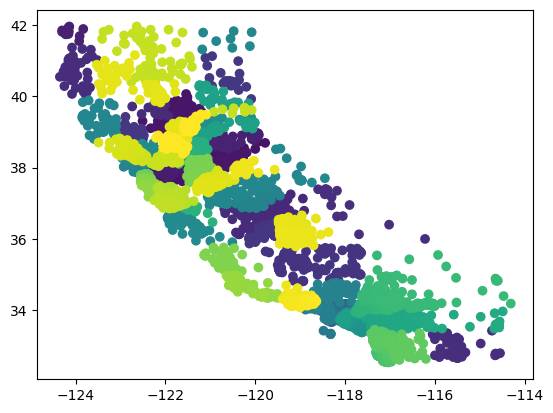

In [29]:
# Plot based on 'order'
import matplotlib.pyplot as plt
plt.scatter(x = housing["longitude"], y = housing["latitude"], c = housing.index)
# housing.index: Sets the color of each point based on its index value in the DataFrame.
#  The index values are used as a continuous variable to create a color gradient, with lower index values corresponding to lighter colors and higher index values corresponding to darker colors.

In [30]:
from sklearn.utils import shuffle
housing_shuffled = shuffle(housing) # Shuffles the rows of the DataFrame randomly

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_bedroom,rooms_per_household,people_per_household,ocean_proximity_enc
8853,-118.47,34.01,43.0,2.9167,461100.0,3.815789,4.640000,1.572000,0.0
19239,-121.01,37.70,12.0,3.2447,142200.0,4.799580,4.936859,2.512682,1.0
9700,-121.84,36.52,18.0,6.5234,357400.0,5.938086,7.292627,3.023041,4.0
19446,-120.80,37.55,18.0,3.1641,96300.0,5.379104,5.477204,3.373860,1.0
17592,-121.84,37.34,27.0,4.2500,162900.0,4.775665,4.775665,5.766160,0.0


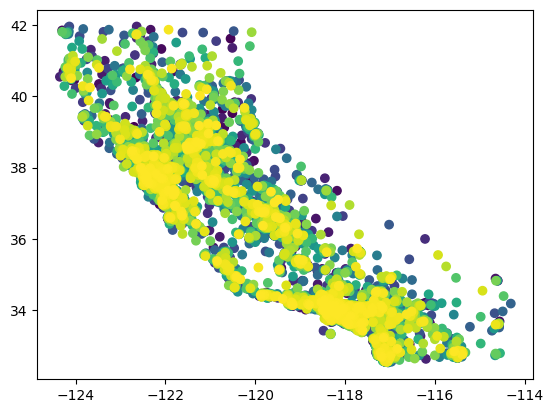

In [31]:
housing_shuffled.reset_index(inplace = False, drop = True)
# reset_index: A method of the DataFrame that resets the index of the DataFrame. By default, it adds a new column to the DataFrame called index, which contains the old index values, and creates a new index that starts from 0 and increments by 1 for each row.
# inplace = False: Returns a new DataFrame with the reset index
# drop = True: the old index values will be dropped in the new DataFrame column in the DataFrame

plt.scatter(x = housing_shuffled["longitude"], y = housing_shuffled["latitude"], c = housing.index)
housing_shuffled.head()

#### 3) Hyper-Parameter Tuning and Cross-validation

In the first section, a hyper-parameter value was "arbitrarily" choosen for the model. However, this value might not be optimal. Usually, you want to compare the model's expected error for a range of different possible hyper-parameters to choose the best one for the task at hand.

In [32]:
from sklearn.model_selection import GridSearchCV, KFold

In [33]:
knn = KNeighborsRegressor() # Find the best k, default is 5

# hyper_parameters = {"hyper_param_name_1" : values_param_1, "hyper_param_name_2" : value_param_2}
hyper_parameters = {"n_neighbors" : np.arange(1, 50, 2)} # Includes values 1 to 50, but not 50 in increments of 2
hyper_parameters['n_neighbors']

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [34]:
# Create an instance of KNeighborsClassifier
knnCV = GridSearchCV(estimator = knn, param_grid = hyper_parameters, scoring = "neg_mean_squared_error",
                       cv = KFold(n_splits = 10, shuffle = True, random_state = 42))
# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: Used for cross-validation. "neg_mean_squared_error" is the negative mean squared error.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set
#    This data is shuffled and set randomly at 42

knnCV.fit(X, y)
# X: Feature matrix
#  y:Target array
#   Cross-validation is a technique used to evaluate the performance of a model by splitting the data into multiple subsets and training the model on different subsets while using the remaining subset for validation.
#   This helps to reduce overfitting and provides a more accurate estimate of the model's performance.

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='neg_mean_squared_error')

In [35]:
#knnCV.cv_results_ is a dictionary .. fit time is 10 (use mean_test_score and std_test_score)
pd.DataFrame(knnCV.cv_results_) # Contains results from CV

# mean_test_score: The mean accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#  mean_train_score: The mean accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#   std_test_score: The standard deviation of the accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#    std_train_score: The standard deviation of the accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#     params: A dictionary of the hyperparameters used for that particular combination.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023485,0.006593,0.026016,0.006926,1,{'n_neighbors': 1},-5.962824e+09,-5.805951e+09,-5.505987e+09,-5.393661e+09,-6.071132e+09,-5.003925e+09,-5.655918e+09,-5.372738e+09,-5.361991e+09,-5.357522e+09,-5.549165e+09,3.077531e+08,25
1,0.023454,0.012316,0.045845,0.010476,3,{'n_neighbors': 3},-4.076306e+09,-4.220124e+09,-3.740752e+09,-3.491043e+09,-4.415999e+09,-3.901215e+09,-3.863660e+09,-3.670299e+09,-3.873148e+09,-4.087633e+09,-3.934018e+09,2.590102e+08,15
2,0.015522,0.000961,0.048254,0.005545,5,{'n_neighbors': 5},-3.712941e+09,-3.951274e+09,-3.508852e+09,-3.384041e+09,-4.183014e+09,-3.682175e+09,-3.582584e+09,-3.543996e+09,-3.732309e+09,-3.843882e+09,-3.712507e+09,2.217204e+08,8
3,0.019918,0.006058,0.050009,0.005722,7,{'n_neighbors': 7},-3.598421e+09,-3.834024e+09,-3.476763e+09,-3.295310e+09,-3.962255e+09,-3.536895e+09,-3.448622e+09,-3.462484e+09,-3.679101e+09,-3.825782e+09,-3.611966e+09,1.989051e+08,4
4,0.019029,0.008147,0.053269,0.006577,9,{'n_neighbors': 9},-3.560413e+09,-3.835742e+09,-3.429328e+09,-3.247473e+09,-3.932631e+09,-3.492733e+09,-3.437045e+09,-3.461650e+09,-3.648237e+09,-3.840511e+09,-3.588576e+09,2.091069e+08,2
5,0.014699,0.003307,0.062325,0.005917,11,{'n_neighbors': 11},-3.569051e+09,-3.870278e+09,-3.449428e+09,-3.214827e+09,-3.944521e+09,-3.467606e+09,-3.423869e+09,-3.433867e+09,-3.621768e+09,-3.814540e+09,-3.580975e+09,2.197191e+08,1
6,0.018512,0.006792,0.061626,0.005435,13,{'n_neighbors': 13},-3.627692e+09,-3.867957e+09,-3.445297e+09,-3.232929e+09,-3.968973e+09,-3.480309e+09,-3.424080e+09,-3.495412e+09,-3.640957e+09,-3.830491e+09,-3.601410e+09,2.187187e+08,3
7,0.018178,0.006763,0.068036,0.007949,15,{'n_neighbors': 15},-3.654890e+09,-3.862485e+09,-3.489598e+09,-3.236655e+09,-4.015141e+09,-3.486632e+09,-3.472264e+09,-3.522880e+09,-3.663278e+09,-3.843659e+09,-3.624748e+09,2.192778e+08,5
8,0.019783,0.006322,0.067863,0.007485,17,{'n_neighbors': 17},-3.742394e+09,-3.875076e+09,-3.543702e+09,-3.257253e+09,-4.031921e+09,-3.498933e+09,-3.499052e+09,-3.542257e+09,-3.670730e+09,-3.869323e+09,-3.653064e+09,2.182342e+08,6
9,0.019626,0.005814,0.071270,0.007139,19,{'n_neighbors': 19},-3.779585e+09,-3.900660e+09,-3.569520e+09,-3.302560e+09,-4.096853e+09,-3.550747e+09,-3.507046e+09,-3.568455e+09,-3.731594e+09,-3.893715e+09,-3.690074e+09,2.221316e+08,7


In [36]:
resCV = knnCV.cv_results_ # Results of the cross-validation

test_MSEs = -resCV["mean_test_score"]
# The negative sign is used because the cross_val_score function in scikit-learn returns negative scores (higher is better),
# but we want to work with positive scores (lower is better) for the MSE.
std_test_MSEs = resCV["std_test_score"]/ np.sqrt(knnCV.n_splits_) # Variability in the estimated test set MSE due to sampling from the data.
k_grid = resCV["param_n_neighbors"].data # An array of the different values of k that were tested

index_best = np.argmin(test_MSEs) # Index of the k value with the lowest MSE estimate, find minimum then the index (arg)
best_k = k_grid[index_best]
best_k # The value of k that gives the lowest estimated test set MSE based on cross-validation

11

In general, smaller $k$ values tend to yield more parsimonious models with lower flexibility and variance compared to larger $k$ values.

In $k$-nearest neighbor ($k$-NN) algorithm, the parameter $k$ represents the number of nearest neighbors used to classify or predict a new data point. When $k$ is set to a small value, such as $k$=1, the model tends to overfit the training data, meaning it captures noise and random fluctuations in the data, leading to high variance. Conversely, when $k$ is set to a large value, such as $k$=$n$, where $n$ is the total number of data points in the training set, the model tends to underfit the data, leading to high bias and low flexibility.

Therefore, a smaller $k$ value strikes a balance between underfitting and overfitting, leading to a more parsimonious model with low flexibility and variance. However, the optimal $k$ value depends on the specific dataset and problem at hand, and it's usually determined by cross-validation or other model selection techniques.

In [37]:
threshold = test_MSEs[index_best] + std_test_MSEs[index_best]
candidates = k_grid[test_MSEs <= threshold]
candidates # 5 points

# Pick k that is most parsimonous, 15 because knn models, the larger the neighbors, less flexible
one_std_rule_best_k = np.max(candidates) # Chooses the maximum out of the 5 candidates
one_std_rule_best_k

15

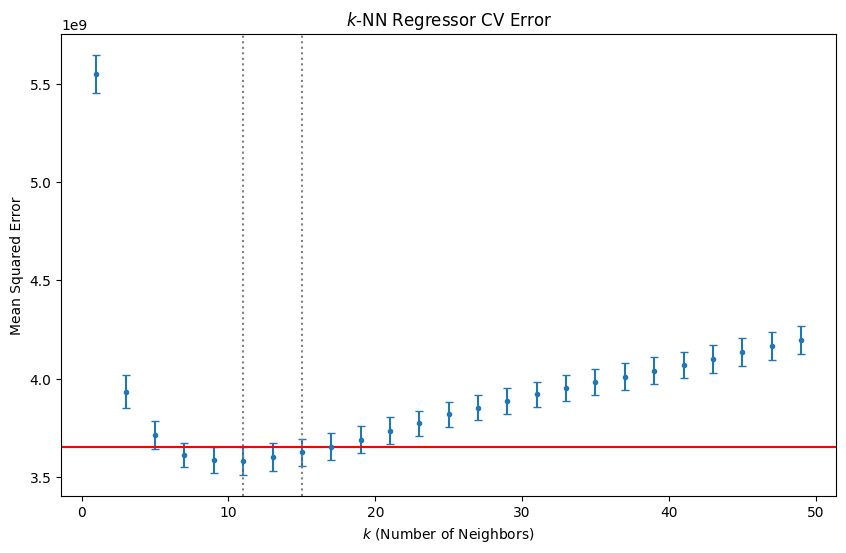

In [38]:
plt.figure(figsize = (10,6)) # Figure dimensions
plt.errorbar(x = k_grid, y = test_MSEs, yerr = std_test_MSEs, fmt = '.', capsize = 3)
# yerr: Parameter specifies the size of the error bars.
# fmt: Specifies that the data points should be plotted as dots.
# capsize: Length of the error bar caps in points.

plt.axvline(best_k, ls = 'dotted', color = "grey") # Vertical line at the k yielding minimum CV MSE
plt.axvline(one_std_rule_best_k, ls = 'dotted', color = "grey") # Vertical line at best k value according to 1 std err rule
plt.axhline(threshold, ls = "solid", color = "red") # Create horizontal red line as the threshold

plt.title("$k$-NN Regressor CV Error") # Label the plot with a title
plt.xlabel('$k$ (Number of Neighbors)') # Label the x-axis
plt.ylabel('Mean Squared Error') # Label the y-axis
plt.show()

In [39]:
mean_squared_error(y_test, y_hat2, squared = False)

76810.40920964915

In [40]:
np.min(np.sqrt(-resCV['mean_test_score']))

59841.252196815265

In [41]:
train_MSEs = [] # Empty list
for k in k_grid:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X, y)
    train_MSEs.append(mean_squared_error(knn.predict(X), y))
# For each value of k in k_grid, a KNeighborsRegressor object is created with that k value.
# The model is then trained on the data (X, y) using the fit() method.
#  Next, the MSE is computed on the training data.
#    MSE is appended to the train_MSEs list, which will contain the MSE for each value of k in k_grid.

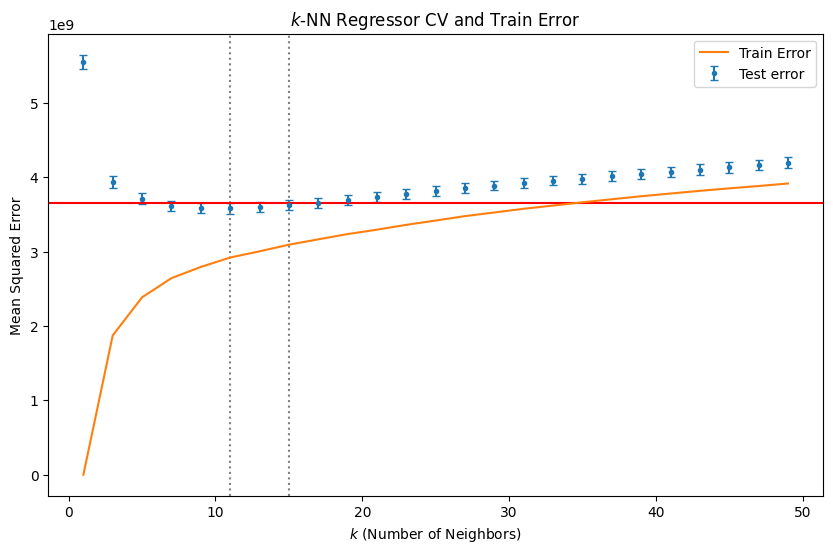

In [42]:
plt.figure(figsize = (10,6)) # Figure dimensions
plt.errorbar(x = k_grid, y = test_MSEs, yerr = std_test_MSEs, fmt = '.', capsize = 3,
             label = "Test error")
# yerr: Parameter specifies the size of the error bars.
# fmt: Specifies that the data points should be plotted as dots.
# capsize: Length of the error bar caps in points.

plt.axvline(best_k, ls = 'dotted', color = "grey") # Vertical line at the k yielding minimum CV MSE
plt.axvline(one_std_rule_best_k, ls = 'dotted', color = "grey") # Vertical line at best k value according to 1 std err rule
plt.axhline(threshold, ls = "solid", color = "red") # Create horizontal red line as the threshold

plt.plot(k_grid, train_MSEs, label = "Train Error") # Plot data generated from last code chunk
plt.legend(loc = "upper right") # Display legend

plt.title("$k$-NN Regressor CV and Train Error") # Label the plot with a title
plt.xlabel('$k$ (Number of Neighbors)') # Label the x-axis
plt.ylabel('Mean Squared Error') # Label the y-axis
plt.show()

In [43]:
knn_final = KNeighborsRegressor(n_neighbors = one_std_rule_best_k) # Create an instance and set the parameter to one_std_rule_best_k in this supervised ML algorithm for regression tasks
knn_final.fit(X, y) # Estimator that will be used on new data

KNeighborsRegressor(n_neighbors=15)

#### 4.0) Pipelines and Cross-validation

**Motivation**

There is one essential detail that has been left-out in the first two parts of this notebook. As $k$-NN relies on euclidean distance to select the nearest points, it is always better to work with standardized data (each variable rescaled to be centered at 0 and have unit variance). That way the same distance along each feature axis is proportional for each variable.

In [44]:
from sklearn.preprocessing import StandardScaler

# Create the scaler:
scaler = StandardScaler()  # Object

# Estimate the mean and variances for each variable on the training set only:
scaler.fit(X_train)

print("Original means:", scaler.mean_)
print("Original Variances:", scaler.var_)

# Scale the training and test features, using the previously estimated means and variances
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Original means: [-119.58051328   35.64056895   28.61501285    3.87069684    4.98214201
    5.42498593    3.10022784    1.17117338]
Original Variances: [  4.02337913   4.56298874 158.175595     3.60151825   1.37041922
   5.56867348 135.72595174   2.02796139]


#### 4.1) Cross-validation with Pipelines

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
knn_pipe = Pipeline([("scaler", StandardScaler()),
                     ("kNN", KNeighborsRegressor())])
# Pipeline consists of two steps:
#  1. StandardScaler: This step applies the standard scaling technique to the input features.
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. KNeighborsRegressor: This step fits a K-Nearest Neighbors regression model to the scaled input features.
#  K-Nearest Neighbors is a non-parametric regression algorithm that predicts the output value for a new input by averaging the output values of the K nearest training examples in the feature space.

In [47]:
knn_pipe.fit(X, y) # Fit the pipeline on training data
pipe_predictions = knn_pipe.predict(X) # Predict with pipeline with test data

In [48]:
mean_squared_error(y, pipe_predictions)

2471694691.546898

In [49]:
#Declare Pipe and grid:
knn_pipe = Pipeline([("scaler", StandardScaler()),
                     ("kNN", KNeighborsRegressor())])

hyper_parameters = {"kNN__n_neighbors" : np.arange(1,49,2)}


In [50]:
#Declare and fit the grid search:
knn_pipeCV = GridSearchCV(estimator = knn_pipe, param_grid = hyper_parameters, scoring = "neg_mean_squared_error",
                       cv = KFold(n_splits = 10 , shuffle = True, random_state = 1))

# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: Used for cross-validation. "neg_mean_squared_error" is the negative mean squared error.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set
#    This data is shuffled and set randomly at 42

knn_pipeCV.fit(X, y)
# X: Feature matrix
#  y:Target array
#   Cross-validation is a technique used to evaluate the performance of a model by splitting the data into multiple subsets and training the model on different subsets while using the remaining subset for validation.
#   This helps to reduce overfitting and provides a more accurate estimate of the model's performance.

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kNN', KNeighborsRegressor())]),
             param_grid={'kNN__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47])},
             scoring='neg_mean_squared_error')

In [51]:
#Compute "best" k value and its index:
resCV = knn_pipeCV.cv_results_ # Results of the cross-validation

test_MSEs = -resCV["mean_test_score"]
# The negative sign is used because the cross_val_score function in scikit-learn returns negative scores (higher is better),
# but we want to work with positive scores (lower is better) for the MSE.
std_test_MSEs = resCV["std_test_score"] / np.sqrt(10) # Variability in the estimated test set MSE due to sampling from the data.
k_grid = resCV["param_kNN__n_neighbors"].data  # An array of the different values of k that were tested

index_best = np.argmin(test_MSEs) # Index of the k value with the lowest MSE estimate, find minimum then the index (arg)
best_k = k_grid[index_best]
best_k # The value of k that gives the lowest estimated test set MSE based on cross-validation

9

In [52]:
# resCV is a dictionary .. fit time is 10 (use mean_test_score and std_test_score)
pd.DataFrame(resCV)

# mean_test_score: The mean accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#  mean_train_score: The mean accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#   std_test_score: The standard deviation of the accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#    std_train_score: The standard deviation of the accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#     params: A dictionary of the hyperparameters used for that particular combination.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020920,0.006179,0.054475,0.006488,1,{'kNN__n_neighbors': 1},-5.867118e+09,-5.393009e+09,-5.964867e+09,-6.433410e+09,-5.472311e+09,-5.486419e+09,-5.665255e+09,-5.146922e+09,-6.060335e+09,-5.771927e+09,-5.726157e+09,3.553802e+08,24
1,0.019497,0.006327,0.070198,0.007268,3,{'kNN__n_neighbors': 3},-4.190561e+09,-3.962058e+09,-4.218548e+09,-4.178971e+09,-4.147111e+09,-3.934364e+09,-4.047449e+09,-3.811258e+09,-4.016145e+09,-4.162982e+09,-4.066945e+09,1.278198e+08,23
2,0.020842,0.005783,0.083581,0.005625,5,{'kNN__n_neighbors': 5},-3.829049e+09,-3.631132e+09,-3.957117e+09,-3.962824e+09,-3.847953e+09,-3.676656e+09,-3.832066e+09,-3.563683e+09,-3.682728e+09,-3.843569e+09,-3.782678e+09,1.294585e+08,13
3,0.024045,0.008194,0.097357,0.010780,7,{'kNN__n_neighbors': 7},-3.789373e+09,-3.530546e+09,-3.848485e+09,-3.841699e+09,-3.763143e+09,-3.656992e+09,-3.706978e+09,-3.478151e+09,-3.647897e+09,-3.764427e+09,-3.702769e+09,1.186254e+08,5
4,0.023203,0.005863,0.103262,0.009432,9,{'kNN__n_neighbors': 9},-3.733033e+09,-3.482355e+09,-3.836875e+09,-3.826706e+09,-3.712384e+09,-3.623981e+09,-3.678720e+09,-3.450836e+09,-3.640092e+09,-3.766023e+09,-3.675101e+09,1.238812e+08,1
5,0.027303,0.006302,0.107106,0.021744,11,{'kNN__n_neighbors': 11},-3.734255e+09,-3.480820e+09,-3.877832e+09,-3.842398e+09,-3.728839e+09,-3.612781e+09,-3.676319e+09,-3.424723e+09,-3.638664e+09,-3.807548e+09,-3.682418e+09,1.407583e+08,2
6,0.018148,0.004651,0.105463,0.007324,13,{'kNN__n_neighbors': 13},-3.738204e+09,-3.483995e+09,-3.874774e+09,-3.840426e+09,-3.719008e+09,-3.596485e+09,-3.685959e+09,-3.470852e+09,-3.620689e+09,-3.834593e+09,-3.686499e+09,1.359221e+08,3
7,0.022970,0.007305,0.110001,0.011864,15,{'kNN__n_neighbors': 15},-3.736233e+09,-3.452941e+09,-3.883904e+09,-3.844169e+09,-3.743345e+09,-3.625596e+09,-3.661183e+09,-3.491728e+09,-3.638024e+09,-3.862512e+09,-3.693963e+09,1.411176e+08,4
8,0.021498,0.006548,0.111915,0.006216,17,{'kNN__n_neighbors': 17},-3.754528e+09,-3.447835e+09,-3.906119e+09,-3.873811e+09,-3.758294e+09,-3.655998e+09,-3.674959e+09,-3.479758e+09,-3.663547e+09,-3.876297e+09,-3.709115e+09,1.501008e+08,6
9,0.025550,0.007519,0.116989,0.007925,19,{'kNN__n_neighbors': 19},-3.780239e+09,-3.483090e+09,-3.937000e+09,-3.883691e+09,-3.750376e+09,-3.668015e+09,-3.668185e+09,-3.474520e+09,-3.695451e+09,-3.856384e+09,-3.719695e+09,1.481256e+08,7


In [53]:
# Compute best k based on one std error rule (another way):
one_std_rule_best_k = np.max(k_grid[test_MSEs <= test_MSEs[index_best] + std_test_MSEs[index_best]])

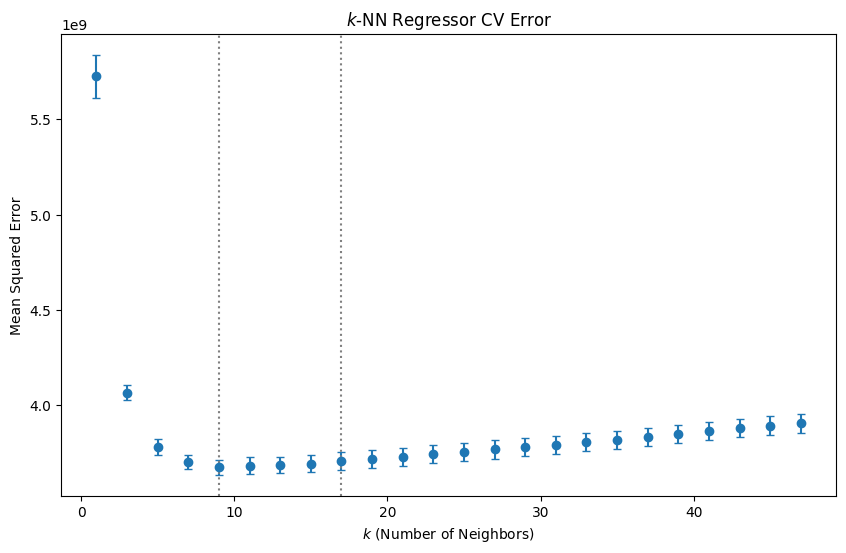

In [54]:
#Plot the grid-search results:
plt.figure(figsize = (10,6)) # Figure dimensions
plt.errorbar(x = k_grid, y = test_MSEs, yerr = std_test_MSEs, fmt = 'o', capsize = 3)
# yerr: Parameter specifies the size of the error bars.
# fmt: Specifies that the data points should be plotted as dots.
# capsize: Length of the error bar caps in points.

plt.axvline(best_k, ls = 'dotted', color = "grey") # Vertical line at the k yielding minimum CV MSE
plt.axvline(one_std_rule_best_k, ls = 'dotted', color = "grey") # Vertical line at best k value according to 1 std err rule

plt.title("$k$-NN Regressor CV Error")  # Label the plot with a title
plt.xlabel('$k$ (Number of Neighbors)') # Label the x-axis
plt.ylabel('Mean Squared Error') # Label the y-axis
plt.show()

In [55]:
#Fit the final model:
pipe_knn_final = KNeighborsRegressor(n_neighbors=one_std_rule_best_k) # Create an instance and set the parameter to one_std_rule_best_k in this supervised ML algorithm for regression tasks
pipe_knn_final.fit(X, y) # Estimator that will be used on new data

KNeighborsRegressor(n_neighbors=17)